## Evaluate Progress of Labellers

Use this notebook to evaluate the progress of labellers and to inspect their labels against imagery. 

## Set-up 

In [1]:
import os
import sys
import pandas as pd
module_path = os.path.abspath(os.path.join('src'))
sys.path.insert(0, module_path)

from labelreview import labelReview

## Get assignment data

In [2]:
lr = labelReview(config="config-db.yaml")
query = \
    "SELECT name,hit_id,assignment_id,worker_id,email,score,status,kml_type "\
    "FROM assignment_data "\
    "LEFT JOIN hit_data USING (hit_id) "\
    "LEFT JOIN kml_data USING (name) "\
    "LEFT JOIN users ON assignment_data.worker_id = users.id"
assignments = lr.get_data(query)

### Summarize assignment counts and score

In [3]:
counts = assignments[["worker_id", "email", "kml_type"]]\
    .groupby(["worker_id", "email", "kml_type"], as_index=False)\
    .value_counts()

scores = assignments[["worker_id", "score"]]\
    .groupby("worker_id", as_index=False)\
    .mean("score")

Assignment counts

In [4]:
counts.pivot_table(values="count", index=["worker_id", "email"], 
                   columns="kml_type")

,kml_type,F,Q
worker_id,email,,
10,stanitebros@gmail.com,400,46
11,pacyedward@gmail.com,448,50
12,kofidadon82@gmail.com,392,33
13,euniceamponsem@gmail.com,576,65
14,segbefiadela@gmail.com,162,15
16,nyarkodelaiah4@gmail.com,402,57
18,licia.abina@yahoo.com,235,22
19,ghxeflide@st.ug.edu.gh,385,44
20,kof1nti@outlook.com,398,60


Assignment counts plotted

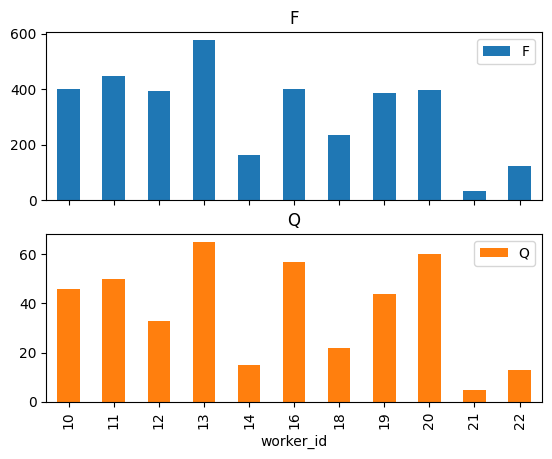

In [5]:
counts.pivot_table(values="count", index="worker_id", columns="kml_type")\
    .plot(subplots=True, kind="bar")
None

Mean score against Q sites for each labeller

In [6]:
scores

,worker_id,score
0,10,0.611980
1,11,0.602765
2,12,0.585598
3,13,0.562445
4,14,0.687093
5,16,0.507934
6,18,0.619379
7,19,0.567428
8,20,0.541602
9,21,0.745212


Distribution of scores for each labeller, as box plots

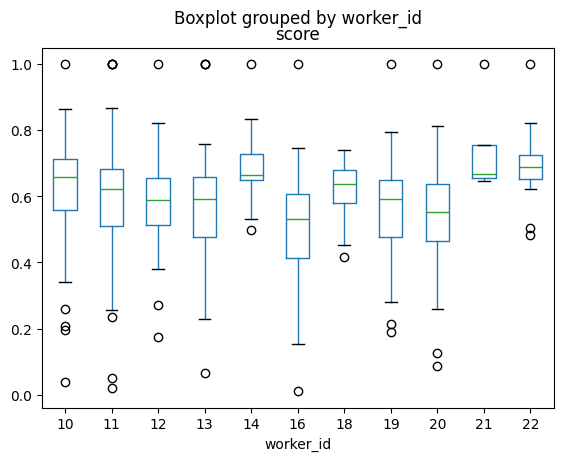

In [7]:
# assignments.query("worker_id==13 & kml_type=='Q'")["score"]
assignments.query("kml_type=='Q'")[["worker_id", "score"]]\
    .boxplot(by='worker_id', column='score', grid=False)
None

Uncomment and adjust this line as needed to see the Q scores for an individual labeller

In [ ]:
# assignments.query("worker_id==20 & kml_type=='Q'")["score"]

## Evaluate labels against imagery

Select a particular labeller's map by ID, and then evaluate their labels at a particular site. 

Labels can be selected as follows:

- By type of task, F or Q. If you select "Q" the labeller's maps will be shown against the expert maps for the same site.
- Through random choice, or for a particular site name.

The arguments in the function `lr.get_labels` enable these choices. 

For example, the following call will get one randomly selected Q type site for labeller 10. 

```python
labels = lr.et_labels(id=10)
```
This one will get a site by a particular name:

```python
labels = lr.get_labels(id=13, name="ET0472958")
```


In [7]:
id = 11
labels = lr.get_labels(assignments, id=int(id), type="Q")
# labels = lr.get_labels(assignments, id=int(id), name="LS0012224")

### Show map

In [8]:
lr.plot_labels(labels)

Loading from SHUB


Map(center=[9.4625, 4.1215], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

### Record review

In [11]:
lr.record_review(sample=labels["point"]["name"].loc[0], id=labels["id"],
                 expert_labels=True if labels["type"] == "Q" else False)

What is your rating/feedback for labeller 11 on NE3828505?:  pass, this maps the fields well along their boundaries, and gets all--there might be a few that are not fields.  Some fields could be pastures, but delineation suggests fields
What is your rating/feedback for thecorresponding expert labels for NE3828505?:  pass, same judgement as for labeller 11: this maps the fields well along their boundaries, and gets all--there might be a few that are not fields.  Some fields could be pastures, but delineation suggests fields
